In [1]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from model import Tiramisu
from datagenerator import DataGenerator
from metrics import *

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
allow_growth_session = tf.Session(config=config)
tf.keras.backend.set_session(allow_growth_session)

Using TensorFlow backend.


In [2]:
testG = DataGenerator('openeds_split', 'test', 1)

In [3]:
model = Tiramisu(
    input_shape=(640, 400, 3), n_classes=4, n_filters_first_conv=48,
    n_pool=4, growth_rate=6, n_layers_per_block=3, dropout_p=0.2
)
model.count_params()










Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 640, 400, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 640, 400, 48) 1344        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 640, 400, 48) 192         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 640, 400, 48) 0           batch_normalizatio

211462

In [4]:
model.load_weights('./models/densenet_epoch_0007.hdf5')

In [5]:
im, lb = testG[0]
im.shape, lb.shape

((1, 640, 400, 3), (1, 640, 400, 4))

In [6]:
pred = model.predict(im)
out = np.array(pred[0, ...])
out = np.argmax(out, axis=-1)

In [7]:
np.unique(out, return_counts=True)

(array([0]), array([256000]))

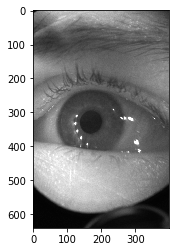

In [8]:
plt.imshow(im[0])

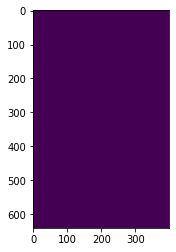

In [9]:
plt.imshow(out)

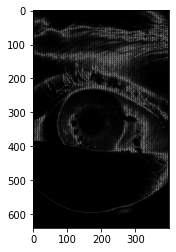

In [15]:
plt.imshow(pred[0, ..., 3], cmap='gray')

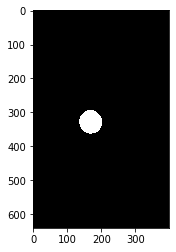

In [11]:
plt.imshow(lb[0, ..., 3], cmap='gray')